# Pre-requisites
Install the following dependencies if it's the first time 

In [9]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy pandas matplotlib seaborn sklearn

In [10]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
# Inline/embedding visualization of created plot
%matplotlib inline

import seaborn
plt.style.use("seaborn")

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn import linear_model

In [11]:
# Several of these libs come bundled with data sets, like 'Tips' (restaurant sector)
df1 = seaborn.load_dataset("tips")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [12]:
# We will try to predict tips from only the total_bill
df1 = df1.drop(df1.iloc[:,2:7], axis = 1)
df1.head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [13]:
df1.describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


Text(0, 0.5, 'Tips')

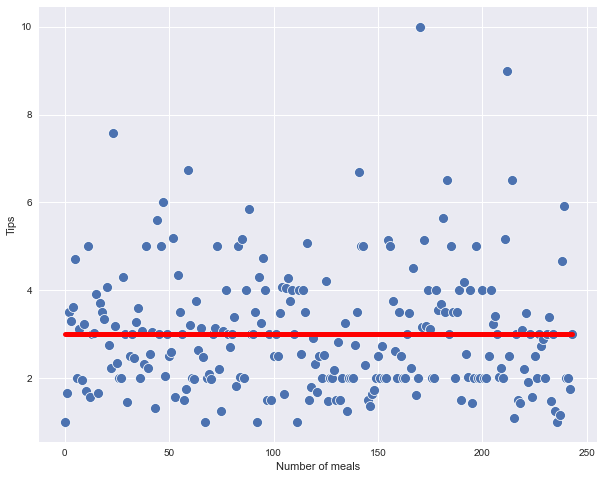

In [14]:
figure_size = (10,8)

# Let's draw the tips and the mean 
plt.figure( figsize = figure_size )
seaborn.scatterplot(data = df1["tip"], s = 100)
seaborn.lineplot(df1.index, df1["tip"].mean(), linewidth = 5, color = 'r')
plt.xlabel( "Number of meals" )
plt.ylabel( "Tips" )

Text(0, 0.5, 'Tips')

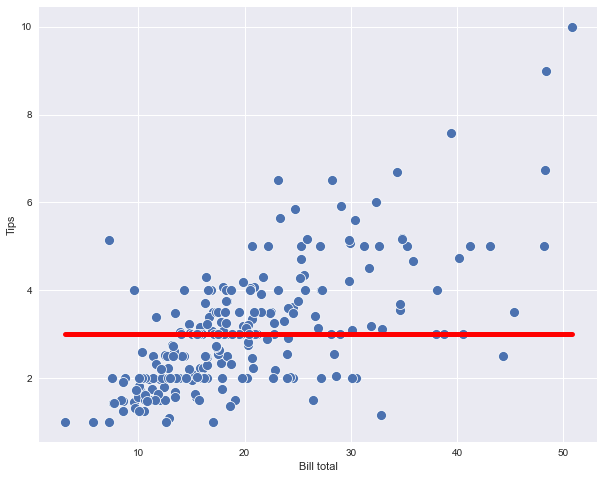

In [15]:
# Let's draw the tips and the mean 
plt.figure( figsize = figure_size )
seaborn.scatterplot( x = df1["total_bill"], y = df1["tip"], s = 100)
seaborn.lineplot( x = df1["total_bill"], y = df1["tip"].mean(), linewidth = 5, color = 'r')
plt.xlabel( "Bill total" )
plt.ylabel( "Tips" )

# It looks like there some kind of correlation between the total bill and the associated tip

In [16]:
from sklearn.model_selection import train_test_split

# training set = 75% of data set
# test set = 25% of data set
X_train, X_test, Y_train, Y_test = train_test_split(
    np.array( df1["total_bill"] ).reshape(-1,1),  
    np.array( df1["tip"] )
)

In [17]:
lr = linear_model.LinearRegression()
lr.fit( X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
predicted_tips = lr.predict(X_test)

Text(0, 0.5, 'Tips')

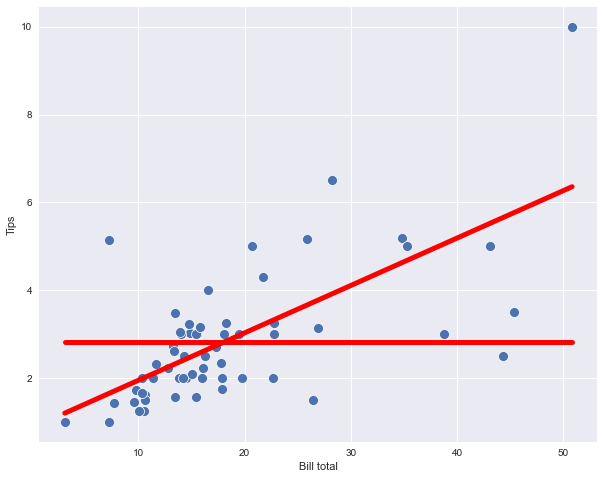

In [19]:
plt.figure( figsize = figure_size )
seaborn.scatterplot( x = X_test.flatten(), y = Y_test, s = 100)
seaborn.lineplot( x = X_test.flatten(), y = Y_test.mean(), linewidth = 5, color = 'r')
seaborn.lineplot( x = X_test.flatten(), y = predicted_tips, linewidth = 5, color = 'r')
plt.xlabel( "Bill total" )
plt.ylabel( "Tips" )

In [20]:
df1["predicted_tips"] = lr.predict( np.array( df1["total_bill"] ).reshape(-1,1) )
df1.head()


,total_bill,tip,predicted_tips
0,16.99,1.01,2.705415
1,10.34,1.66,1.987462
2,21.01,3.50,3.139426
3,23.68,3.31,3.427687
4,24.59,3.61,3.525933


In [21]:
# Model score
lr.score(X_test, Y_test)

0.4112419334558829